In [1]:
import qiskit
from qiskit import assemble, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from random import *
from qiskit import Aer
sim = Aer.get_backend("statevector_simulator")
import numpy as np
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.library import RZGate, RYGate

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time
from IPython.display import clear_output

In [2]:
df = pd.read_csv('FM Monte Carlo 4x4p iterations use previous results.csv')
df

,Unnamed: 0,temp=0.01,temp=1.0807142857142857,temp=2.1514285714285712,temp=3.222142857142857,temp=4.292857142857143,temp=5.363571428571428,temp=6.434285714285714,temp=7.505,temp=8.575714285714286,temp=9.64642857142857,temp=10.717142857142857,temp=11.787857142857144,temp=12.858571428571429,temp=13.929285714285713,temp=15.0
0,0,0.125,1.0,1.000,0.250,0.375,0.125,0.250,0.125,0.625,0.250,0.375,0.125,0.250,0.250,0.000
1,1,0.000,1.0,1.000,0.250,0.250,0.000,0.125,0.125,0.500,0.125,0.500,0.000,0.250,0.125,0.125
2,2,0.000,1.0,1.000,0.250,0.125,0.125,0.000,0.250,0.625,0.250,0.375,0.125,0.125,0.250,0.250
3,3,0.000,1.0,1.000,0.125,0.125,0.000,0.125,0.125,0.750,0.125,0.250,0.000,0.000,0.125,0.375
4,4,0.000,1.0,1.000,0.250,0.125,0.125,0.000,0.000,0.750,0.250,0.125,0.125,0.125,0.250,0.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1.000,1.0,0.375,0.500,0.250,0.250,0.250,0.625,0.250,0.250,0.125,0.000,0.125,0.125,0.125
9996,9996,1.000,1.0,0.500,0.500,0.375,0.125,0.375,0.750,0.250,0.375,0.000,0.125,0.000,0.250,0.250
9997,9997,1.000,1.0,0.375,0.625,0.250,0.125,0.500,0.625,0.250,0.250,0.125,0.000,0.125,0.125,0.125
9998,9998,1.000,1.0,0.375,0.500,0.125,0.000,0.375,0.625,0.375,0.375,0.250,0.000,0.000,0.250,0.000


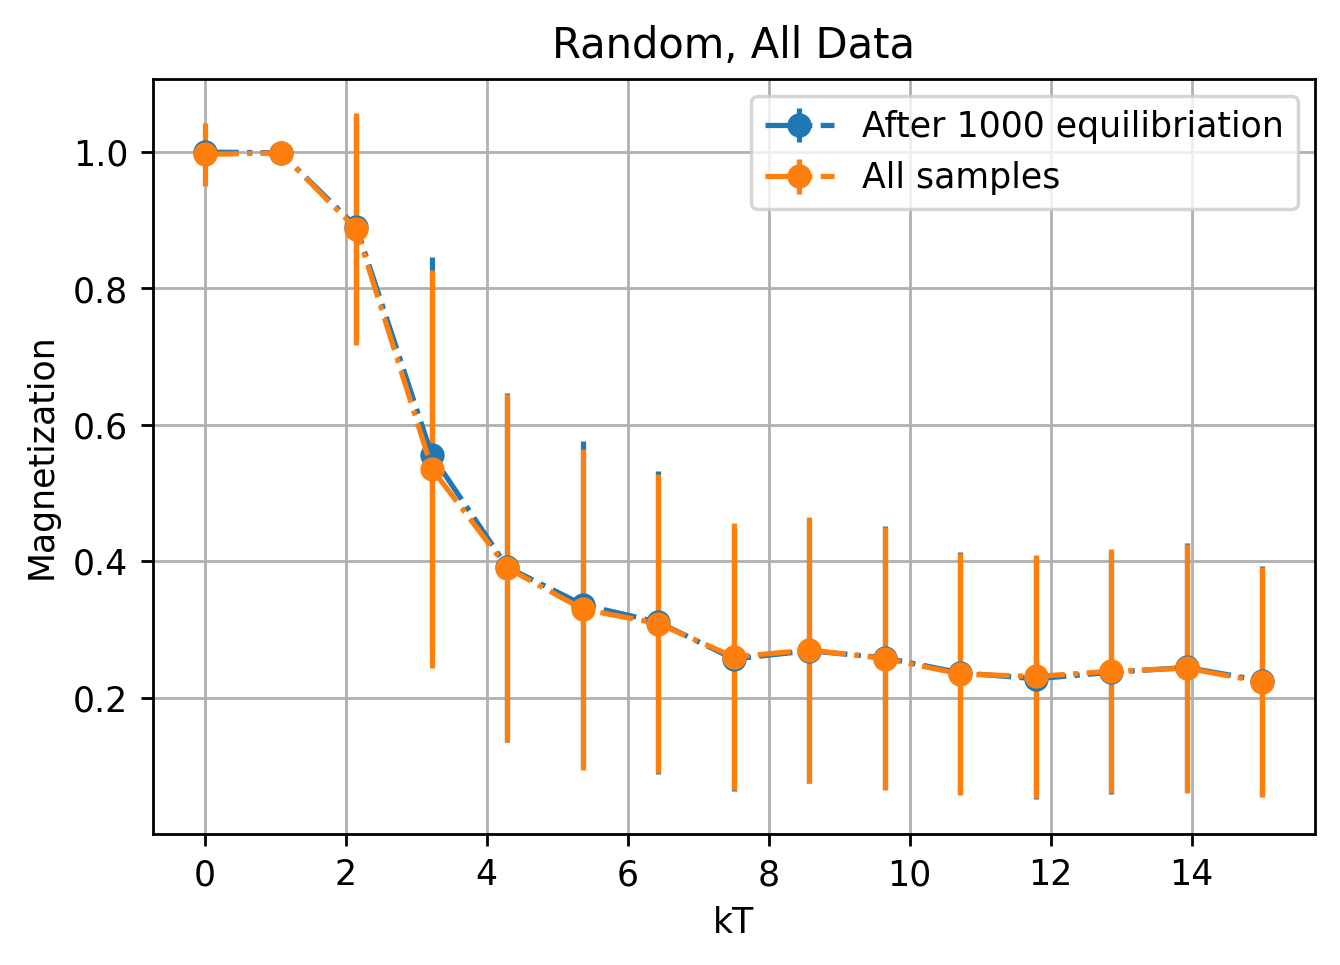

In [4]:
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 15, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb:]))
    std.append(np.std(df[key][eqlb:]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, All Data')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

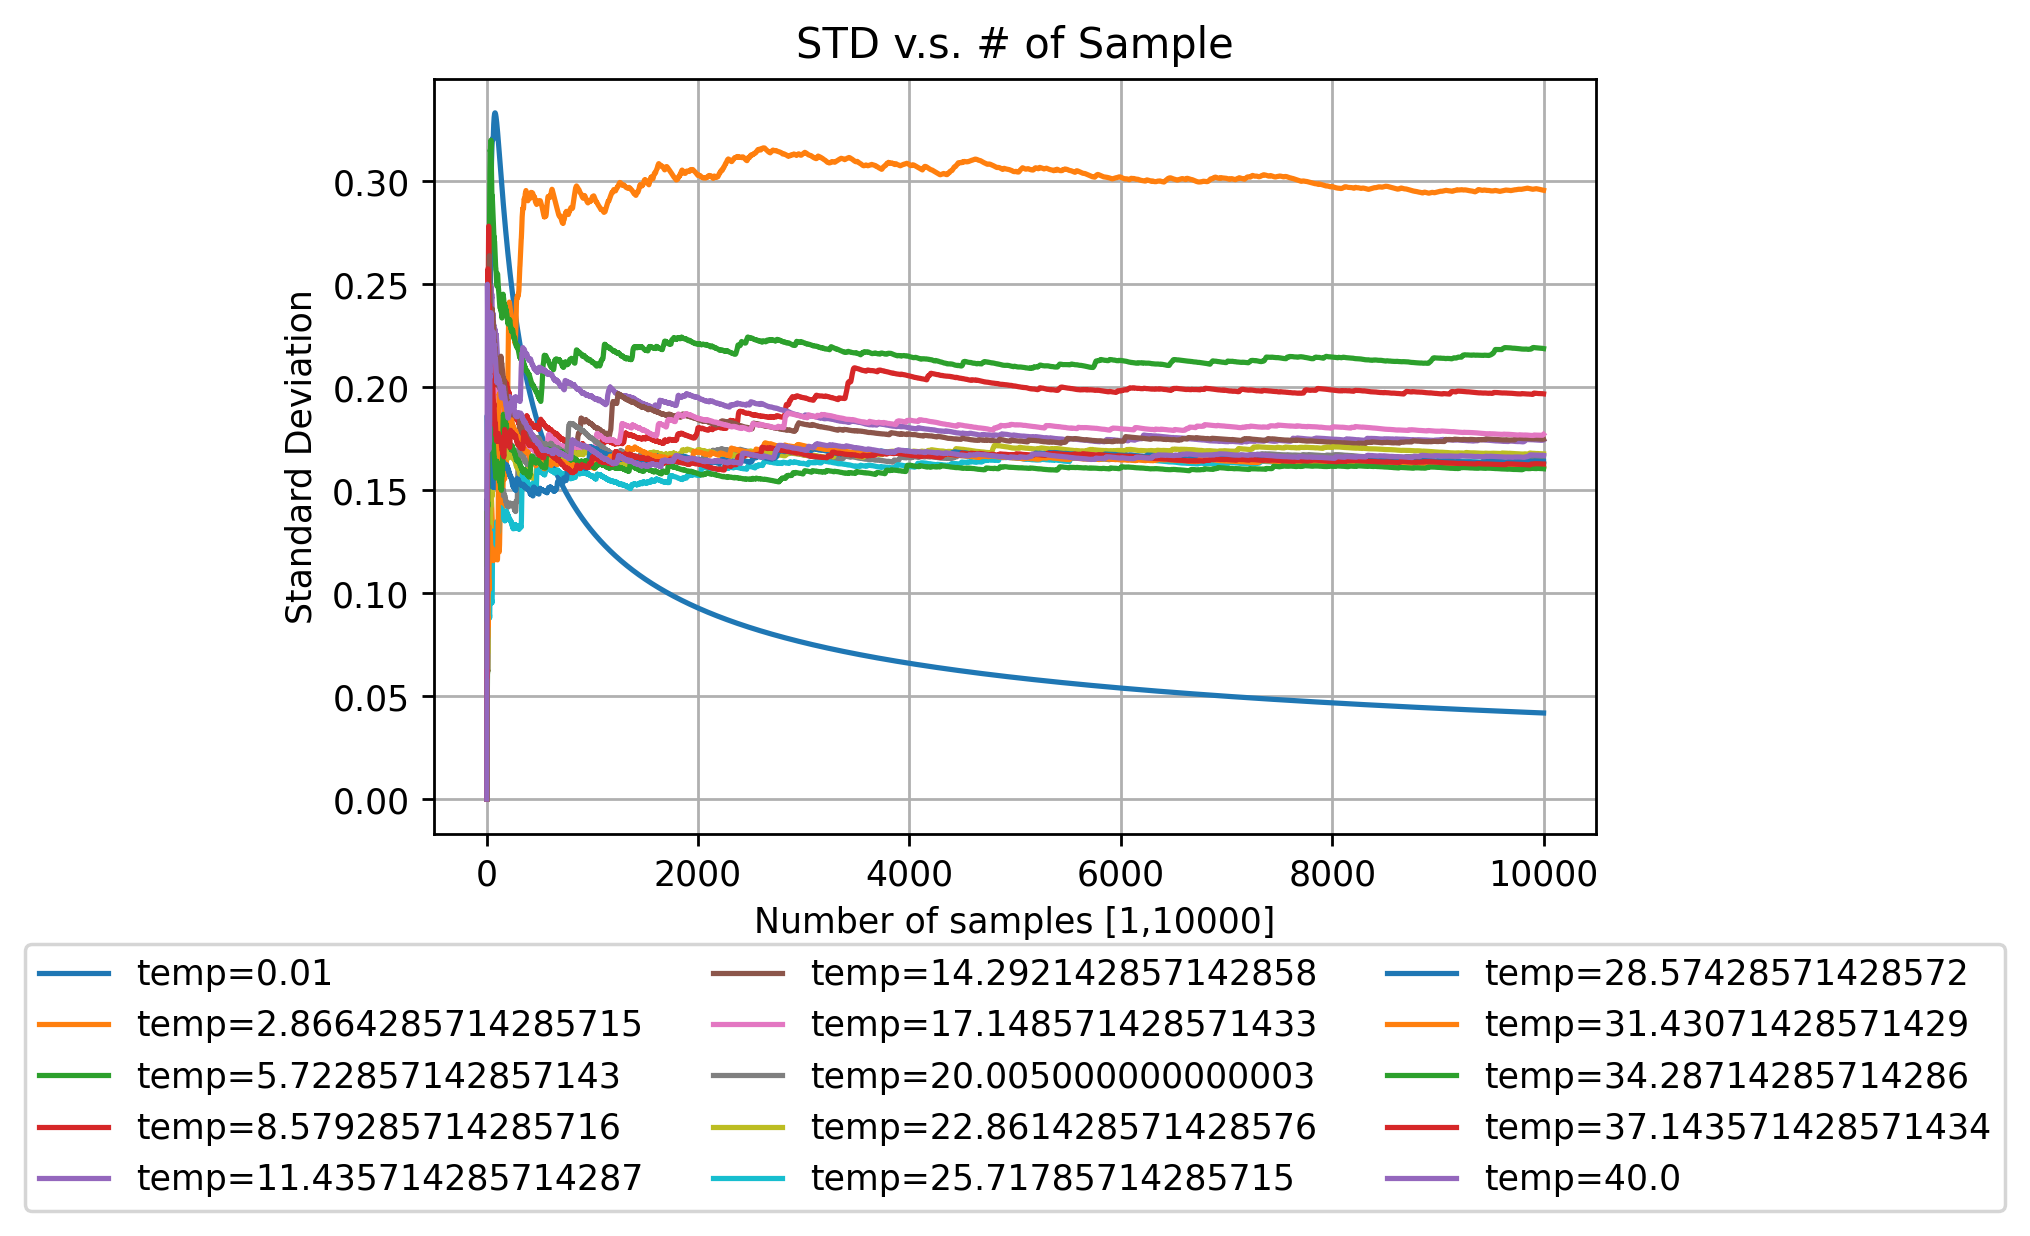

In [4]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

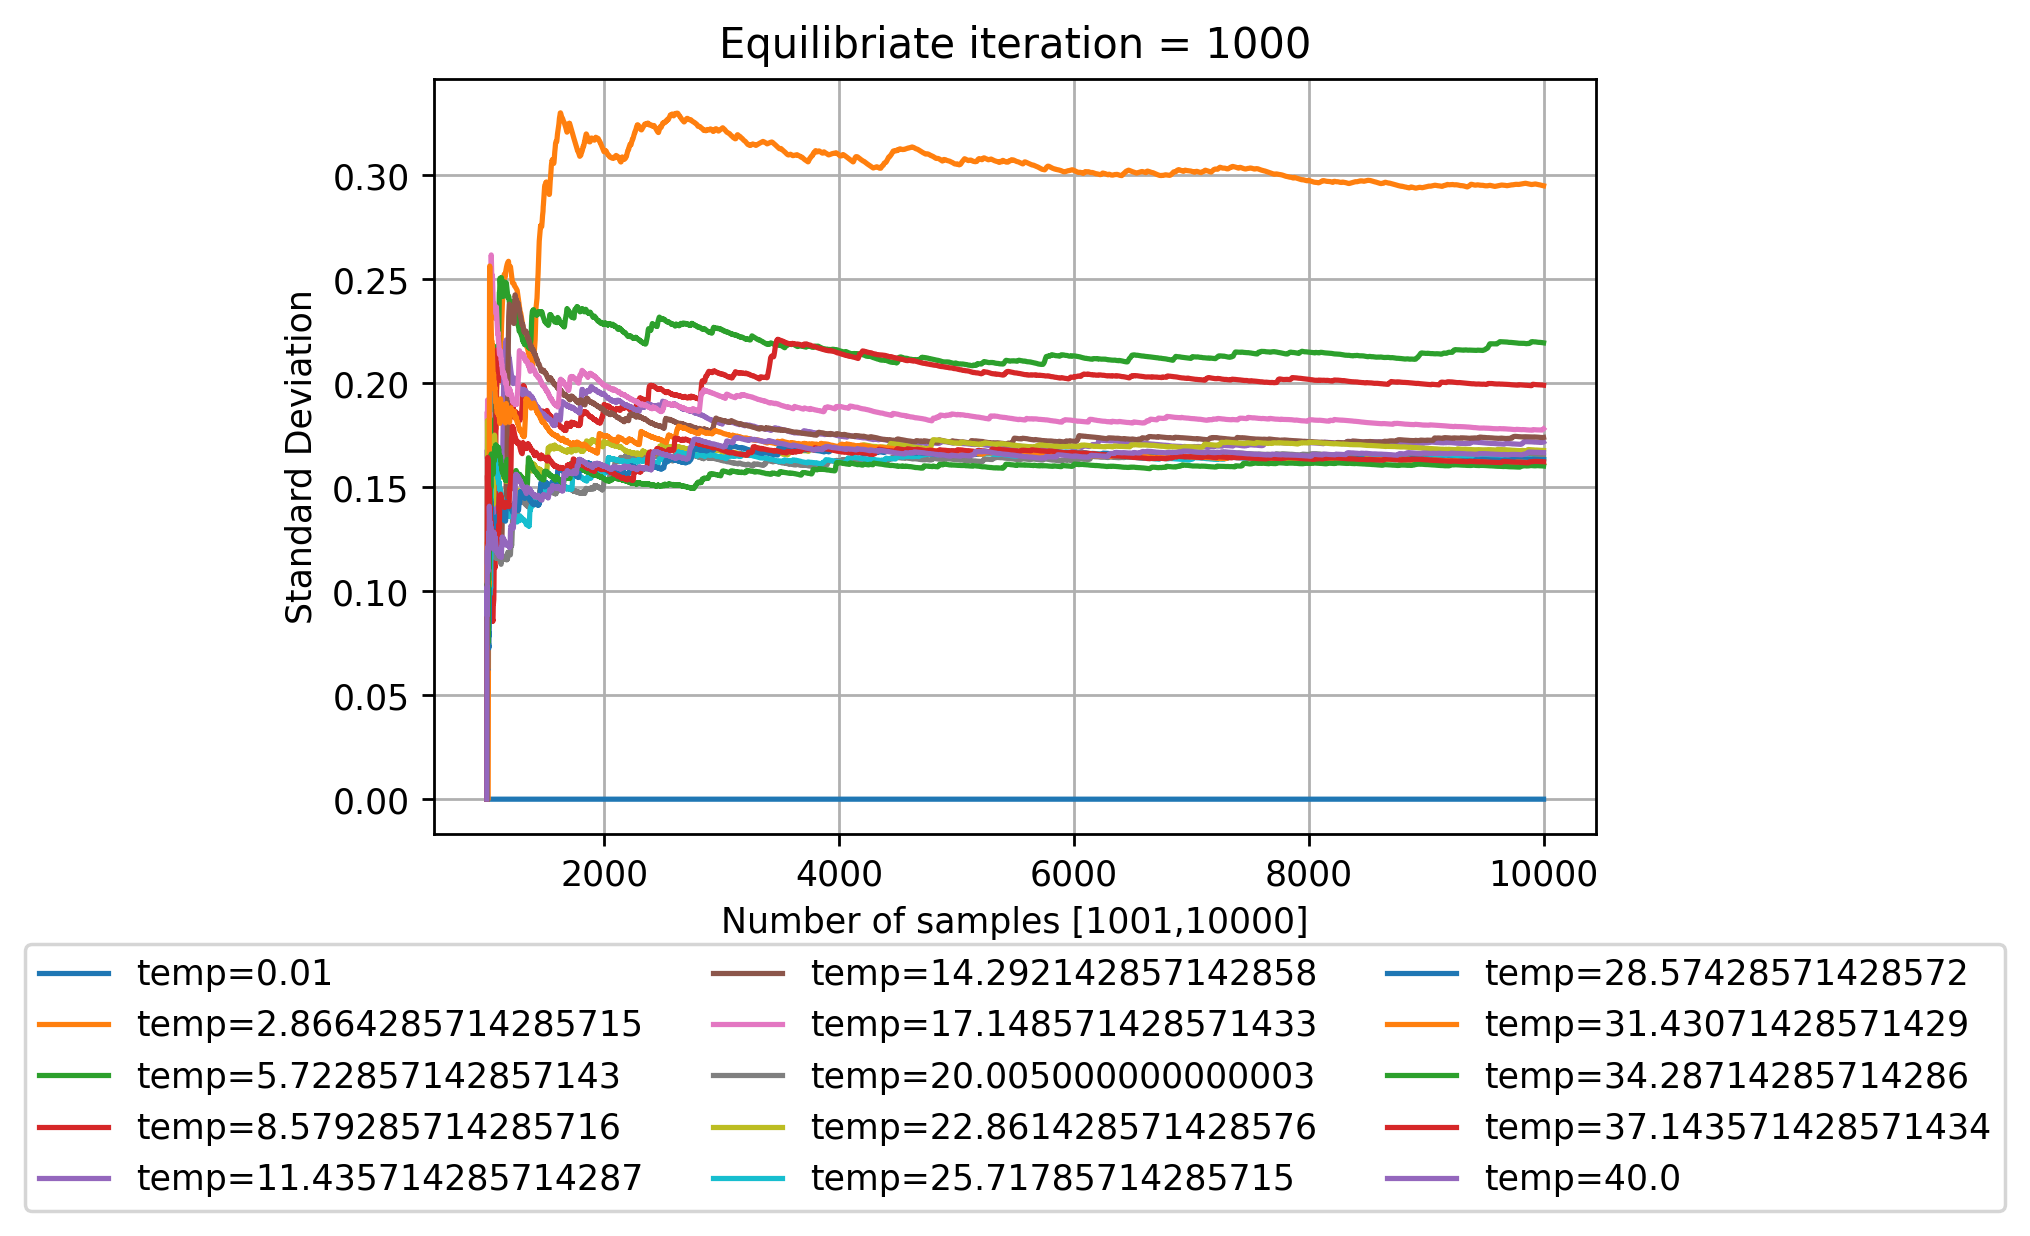

In [5]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb+1, 10000, 10000-eqlb).astype('int64')
for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[eqlb:i]) for i in samples]
    plt.plot(samples, std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

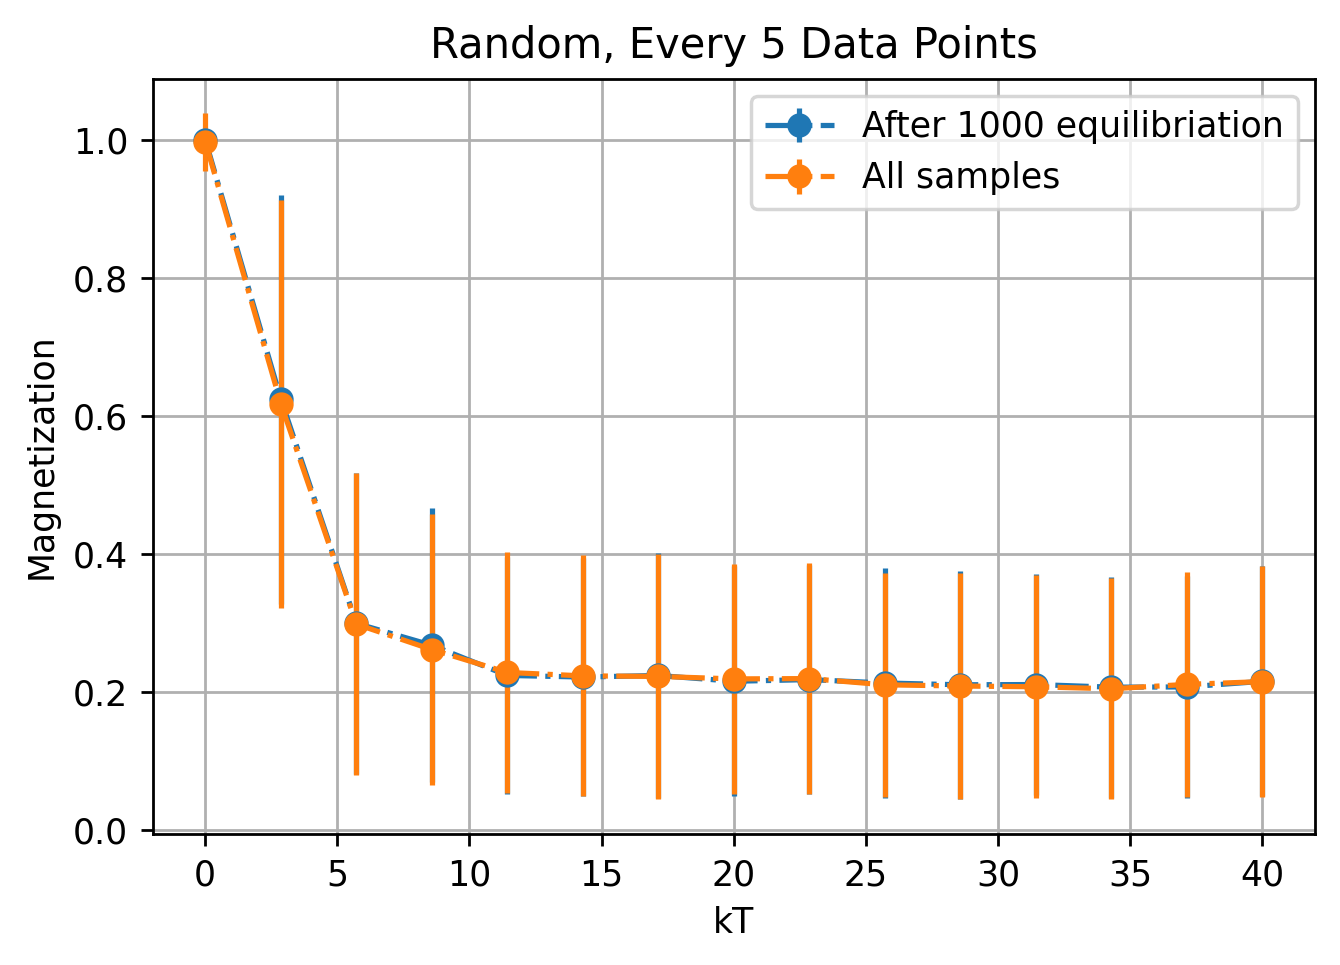

In [6]:
# Every 5th element
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::5]))
    std.append(np.std(df[key][eqlb::5]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, Every 5 Data Points')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


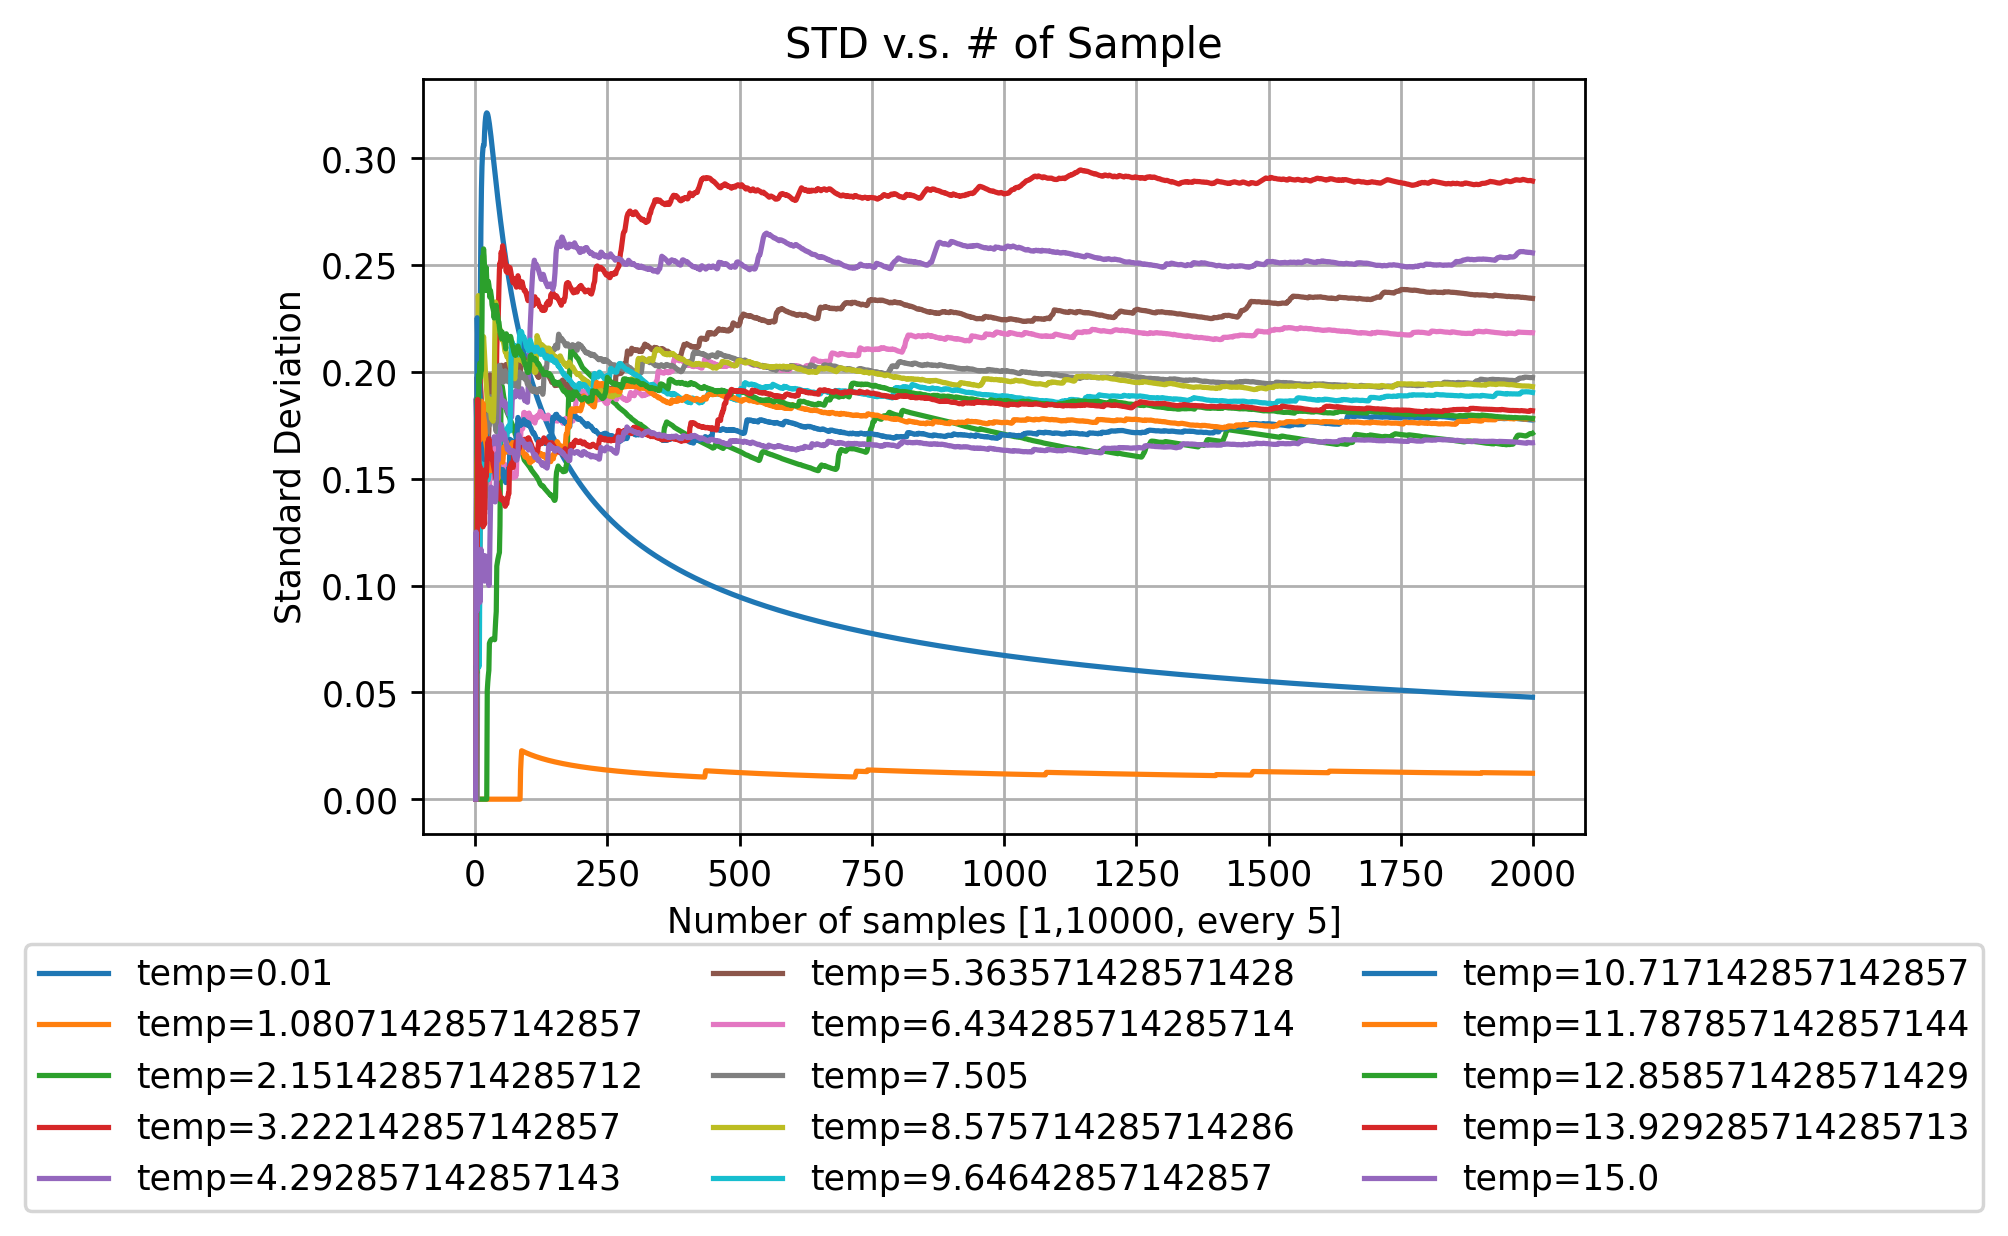

In [5]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::5].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800
1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid 

1800
1800


/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


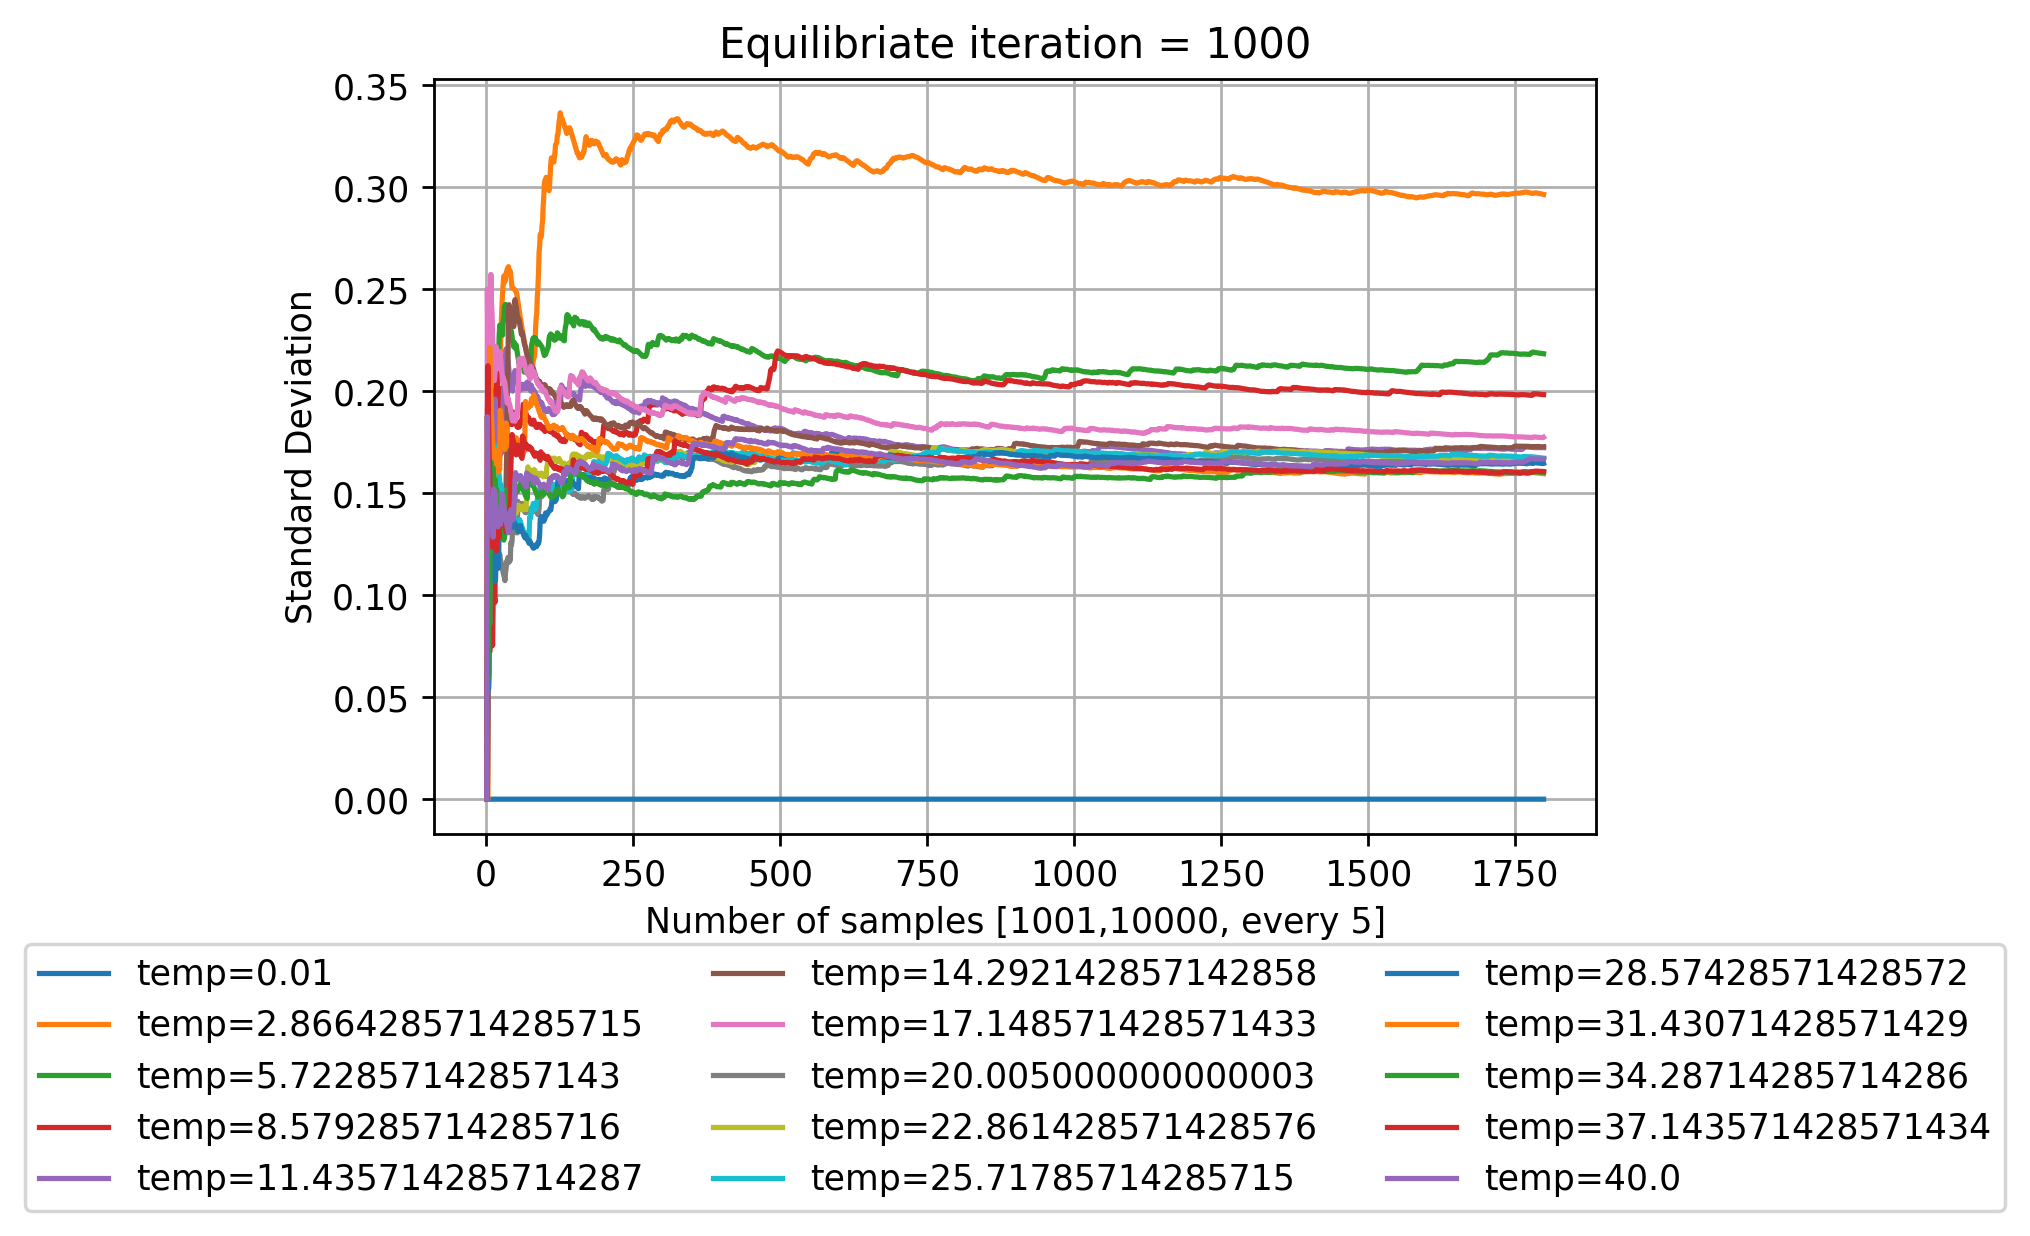

In [8]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::5].tolist()
print(len(samples))
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples].tolist()
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    print(len(std))
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 5]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

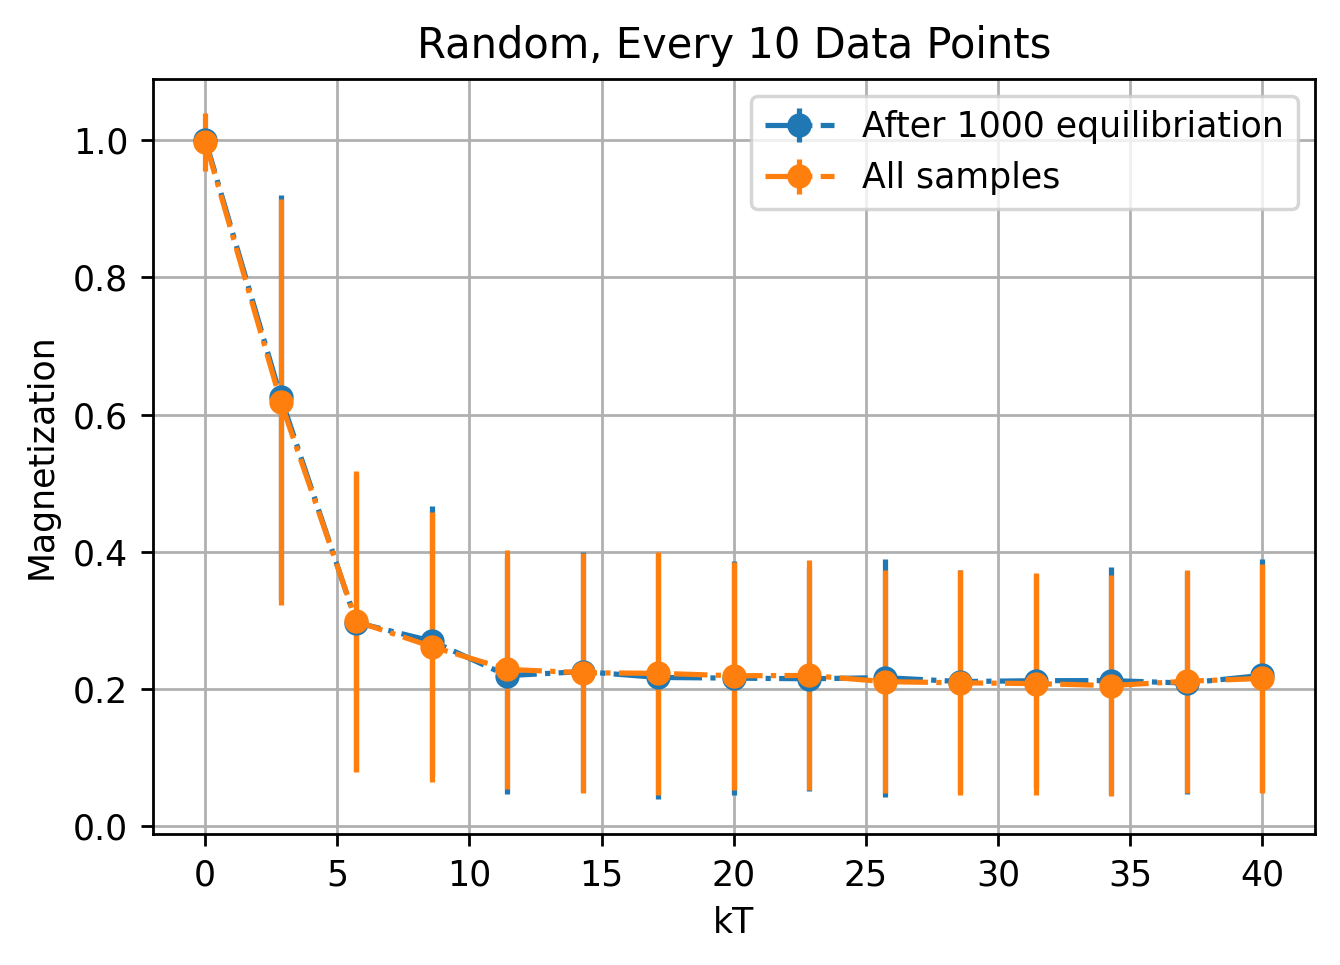

In [12]:
# Every 10th element
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb::10]))
    std.append(np.std(df[key][eqlb::10]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.title('Random, Every 10 Data Points')
plt.grid()

/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/youfuqian/opt/anaconda3/envs/qiskit_latest/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


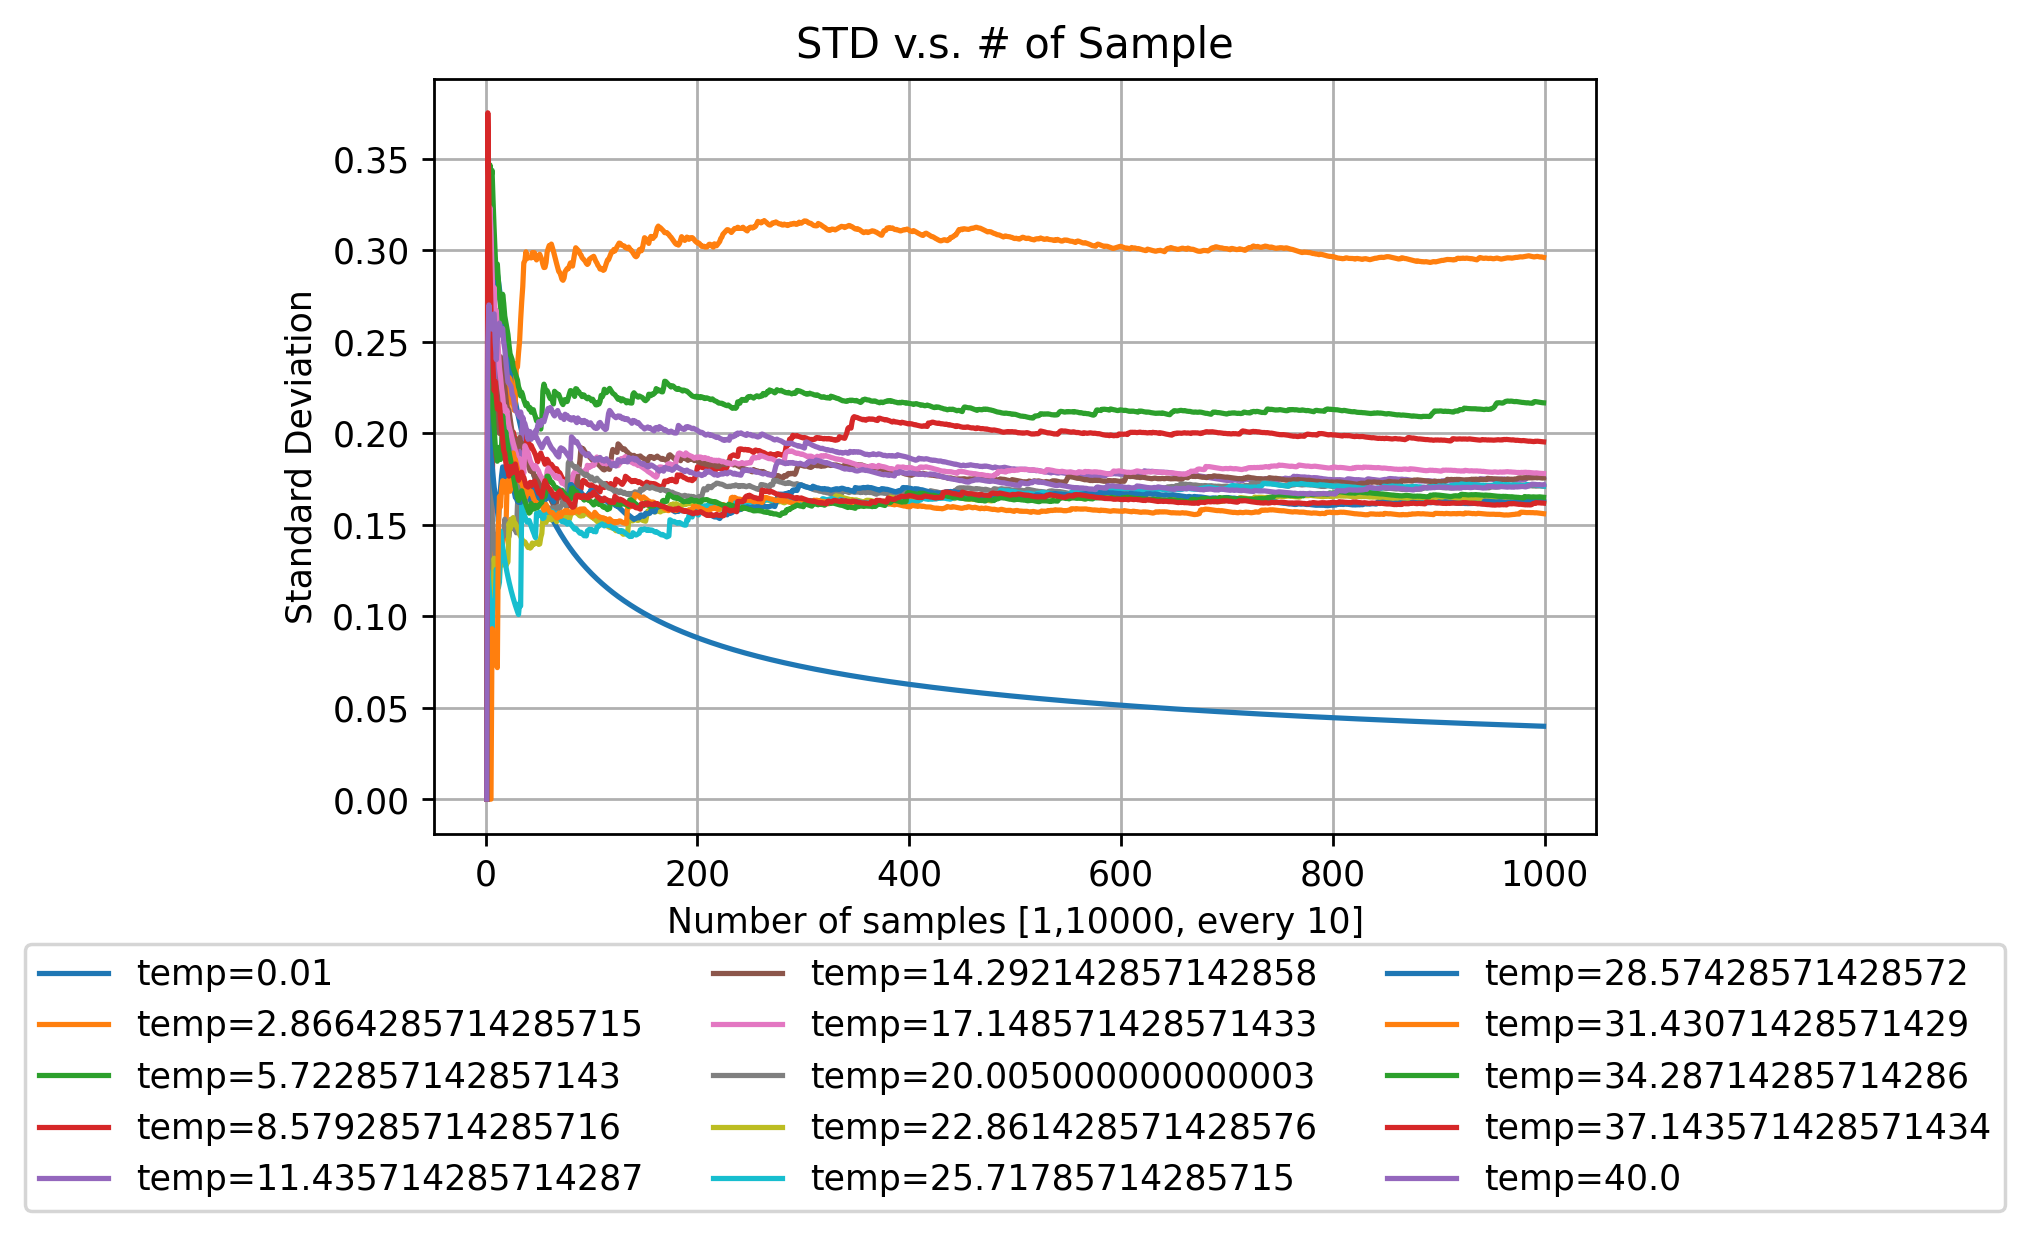

In [14]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = np.array(df[key])
    temp_data = temp_data[0::10]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('STD v.s. # of Sample')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

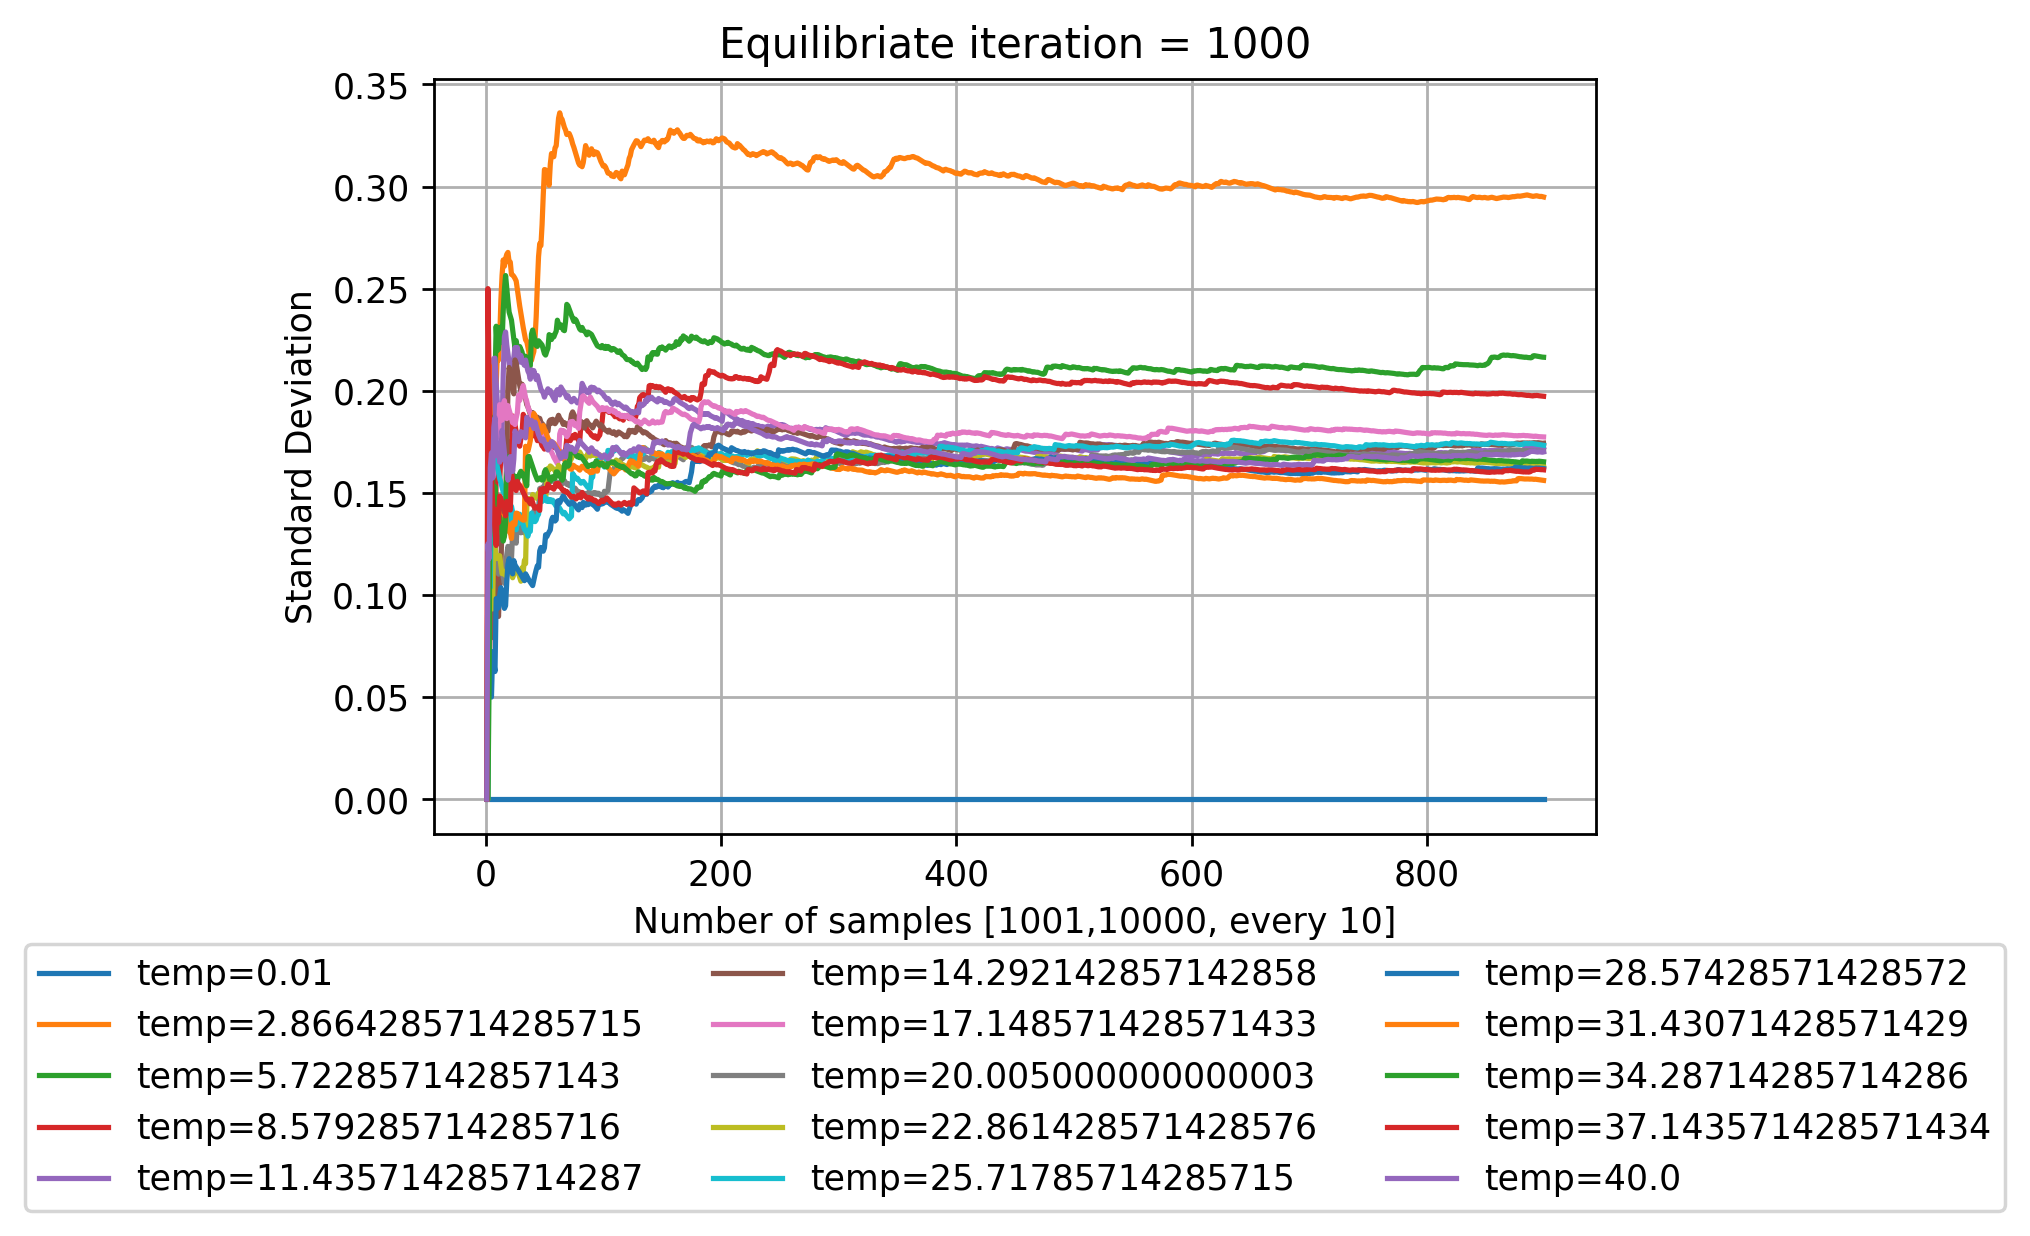

In [11]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb, 9999, 10000-eqlb).astype('int64')
samples = samples[0::10]
for key in keys:
    temp_data = df[key]
    temp_data = temp_data[samples]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples [1001,10000, every 10]')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()